In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Create a sample dataset
data = pd.read_csv(r'placement.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


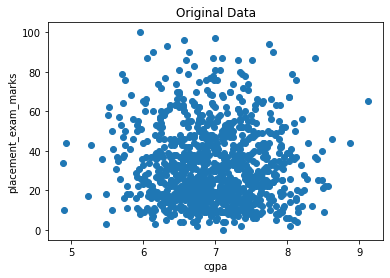

In [38]:
# Visualize the original data
plt.scatter(data['cgpa'], data['placement_exam_marks'])
plt.title('Original Data')
plt.xlabel('cgpa')
plt.ylabel('placement_exam_marks')
plt.show()



In [39]:
# Use K-Means clustering to identify clusters
kmeans = KMeans(n_clusters=2)
data['Cluster'] = kmeans.fit_predict(data[['cgpa', 'placement_exam_marks']])


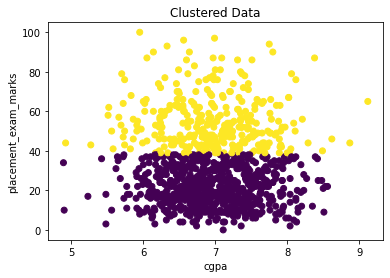

In [40]:

# Visualize the clustered data
plt.scatter(data['cgpa'], data['placement_exam_marks'], c=data['Cluster'], cmap='viridis')
plt.title('Clustered Data')
plt.xlabel('cgpa')
plt.ylabel('placement_exam_marks')
plt.show()

In [52]:
# Calculate distance to cluster centers
data['Distance'] = np.sqrt(
    (data['cgpa'] - kmeans.cluster_centers_[data['Cluster'], 0]) ** 2 +
    (data['placement_exam_marks'] - kmeans.cluster_centers_[data['Cluster'], 1]) ** 2
)

In [53]:
# Set a threshold for outlier detection (adjust as needed)
outlier_threshold = 9

In [54]:
# Identify and remove outliers
data_filtered = data[data['Distance'] < outlier_threshold].drop(['Cluster', 'Distance'], axis=1)

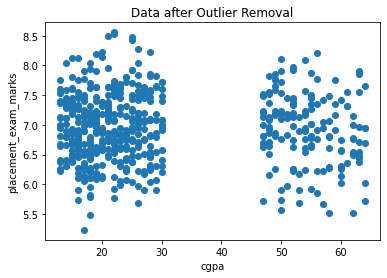

In [55]:
# Visualize the data after removing outliers
plt.scatter(data_filtered['placement_exam_marks'], data_filtered['cgpa'])
plt.title('Data after Outlier Removal')
plt.xlabel('cgpa')
plt.ylabel('placement_exam_marks')
plt.show()